In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/mohan/OneDrive/Desktop/Academics/Project/MultipleDisease/multiple-disease-prediction-streamlit-app-main/multiple-disease-prediction_Exec/Brain-Tumor-Data/Brain-Tumor-Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/mohan/OneDrive/Desktop/Academics/Project/MultipleDisease/multiple-disease-prediction-streamlit-app-main/multiple-disease-prediction_Exec/Brain-Tumor-Data/Brain-Tumor-Data\Testing\glioma_tumor\image(1).jpg
C:/Users/mohan/OneDrive/Desktop/Academics/Project/MultipleDisease/multiple-disease-prediction-streamlit-app-main/multiple-disease-prediction_Exec/Brain-Tumor-Data/Brain-Tumor-Data\Testing\glioma_tumor\image(10).jpg
C:/Users/mohan/OneDrive/Desktop/Academics/Project/MultipleDisease/multiple-disease-prediction-streamlit-app-main/multiple-disease-prediction_Exec/Brain-Tumor-Data/Brain-Tumor-Data\Testing\glioma_tumor\image(100).jpg
C:/Users/mohan/OneDrive/Desktop/Academics/Project/MultipleDisease/multiple-disease-prediction-streamlit-app-main/multiple-disease-prediction_Exec/Brain-Tumor-Data/Brain-Tumor-Data\Testing\glioma_tumor\image(11).jpg
C:/Users/mohan/OneDrive/Desktop/Academics/Project/MultipleDisease/multiple-disease-prediction-streamlit-app-main/multiple-disease-prediction

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [5]:
pip install ipywidgets

   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.3 MB 3.3 MB/s eta 0:00:01
   ---------------------- ----------------- 1.3/2.3 MB 3.4 MB/s eta 0:00:01
   ------------------------------- -------- 1.8/2.3 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [8]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('C:/Users/mohan/OneDrive/Desktop/Academics/Project/MultipleDisease/multiple-disease-prediction-streamlit-app-main/multiple-disease-prediction_Exec/Brain-Tumor-Data/Brain-Tumor-Data/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('C:/Users/mohan/OneDrive/Desktop/Academics/Project/MultipleDisease/multiple-disease-prediction-streamlit-app-main/multiple-disease-prediction_Exec/Brain-Tumor-Data/Brain-Tumor-Data/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [9]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [11]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

C:\Users\mohan\anaconda3\envs\multipledisease\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 65s 753ms/step - accuracy: 0.2531 - loss: 5.5442 - val_accuracy: 0.2891 - val_loss: 1.3639
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 65s 784ms/step - accuracy: 0.3122 - loss: 1.3465 - val_accuracy: 0.4116 - val_loss: 1.2987
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 71s 861ms/step - accuracy: 0.4493 - loss: 1.2100 - val_accuracy: 0.4592 - val_loss: 1.2965
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 71s 859ms/step - accuracy: 0.5612 - loss: 1.0058 - val_accuracy: 0.3401 - val_loss: 1.4438
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 62s 750ms/step - accuracy: 0.6147 - loss: 0.8907 - val_accuracy: 0.5000 - val_loss: 1.1353
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 57s 690ms/step - accuracy: 0.6662 - loss: 0.8095 - val_accuracy: 0.4898 - val_loss: 1.0831
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7274 - loss: 0.6750 - val_accuracy: 0.4694 - val_loss: 1.4935
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 61s 736ms/step - accuracy: 0.7604 - loss: 0.6060 - val_accura

In [18]:
!pip install matplotlib
!pip install seaborn

  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 2.6 MB/s eta 0:00:03
   -------- ------------------------------- 1.6/7.8 MB 2.6 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/7.8 MB 2.8 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/7.8 MB 2.9 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/7.8 MB 2.8 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 3.0 MB/s eta 0:00:02
   ------------------------- -------------- 5.0/7.8 MB 3.0 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7

In [20]:
model.save('braintumor.h5')

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

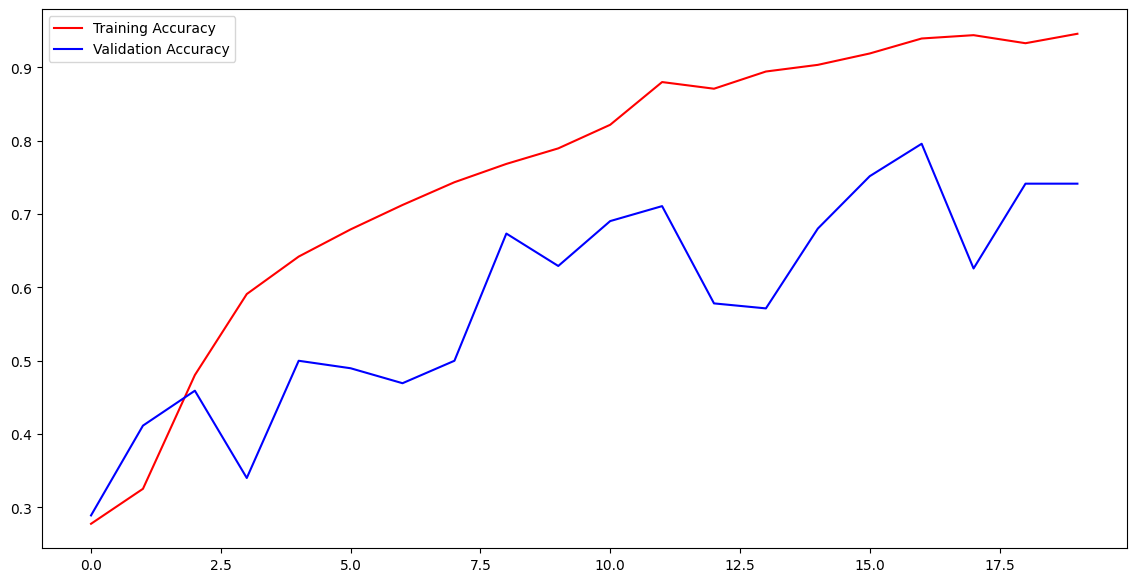

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

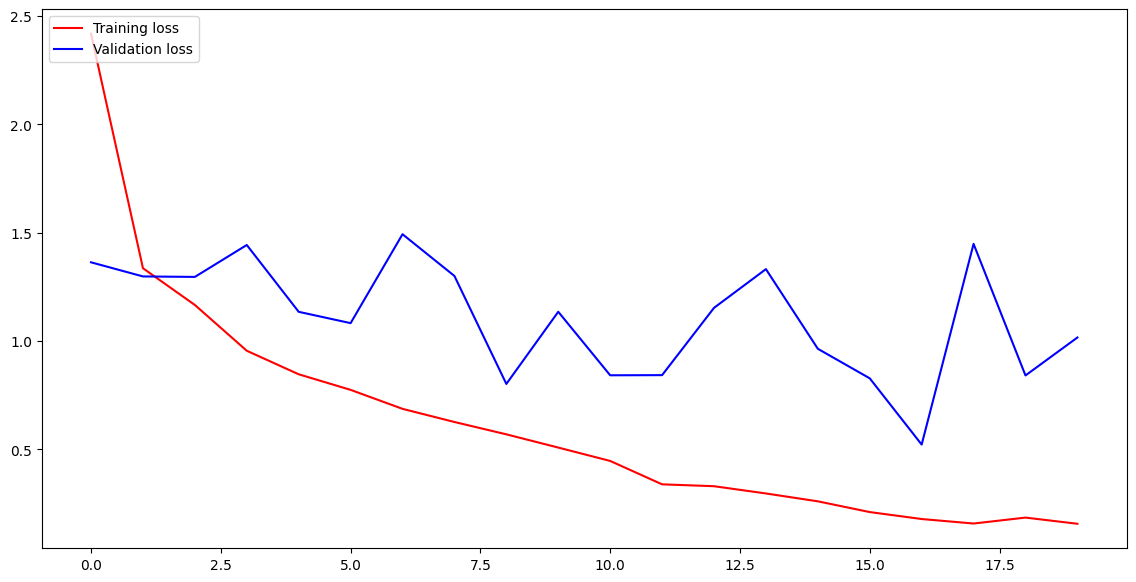

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()